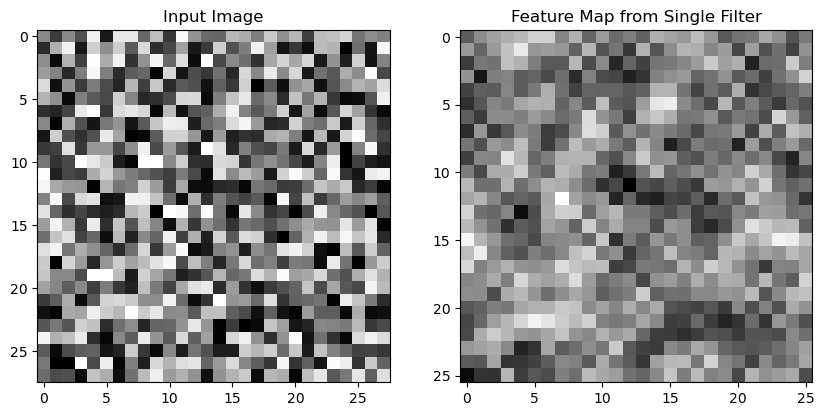

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define a random input image
input_image = np.random.rand(28, 28)

# Define a random filter
filter = np.random.rand(3, 3)

# Define the convolution operation
def convolve2d(image, filter):
    filter_height, filter_width = filter.shape
    image_height, image_width = image.shape
    output_height = image_height - filter_height + 1
    output_width = image_width - filter_width + 1
    output = np.zeros((output_height, output_width))
    
    for y in range(output_height):
        for x in range(output_width):
            output[y, x] = np.sum(image[y:y+filter_height, x:x+filter_width] * filter)
    
    return output

# Perform convolution with a single filter
output_image = convolve2d(input_image, filter)

# Visualize the input and output
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(input_image, cmap='gray')
axes[0].set_title('Input Image')
axes[1].imshow(output_image, cmap='gray')
axes[1].set_title('Feature Map from Single Filter')
plt.show()


[[0.93528232 0.19605071 0.80103484 0.83192107 0.20367494 0.92164472
  0.23375403 0.83847024 0.91940496 0.34435679 0.76961929 0.43002276
  0.11882513 0.61610624 0.17489563 0.9523458  0.98879956 0.39436121
  0.36500539 0.37958058 0.77876002 0.58370672 0.55431797 0.45121829
  0.77340081 0.02512527 0.09313771 0.07408606]
 [0.7110051  0.8517438  0.97241201 0.60004076 0.29712789 0.35645651
  0.210902   0.60868957 0.61141531 0.8753333  0.10040137 0.07952451
  0.71887245 0.42696118 0.19562735 0.11954365 0.48297005 0.12264273
  0.60192927 0.87706883 0.83738429 0.46369852 0.97013667 0.01838169
  0.78314133 0.73478906 0.07177556 0.59426513]
 [0.21771433 0.21375657 0.83819765 0.01227088 0.24895942 0.18622606
  0.89062078 0.10245385 0.56353059 0.54180754 0.77717761 0.6757412
  0.7153168  0.43798965 0.93652096 0.63088209 0.15896424 0.72419536
  0.61872323 0.74490843 0.54327681 0.09837833 0.22405023 0.81675194
  0.50887713 0.60249165 0.4921945  0.93897513]
 [0.47676772 0.22992406 0.64167359 0.3325849

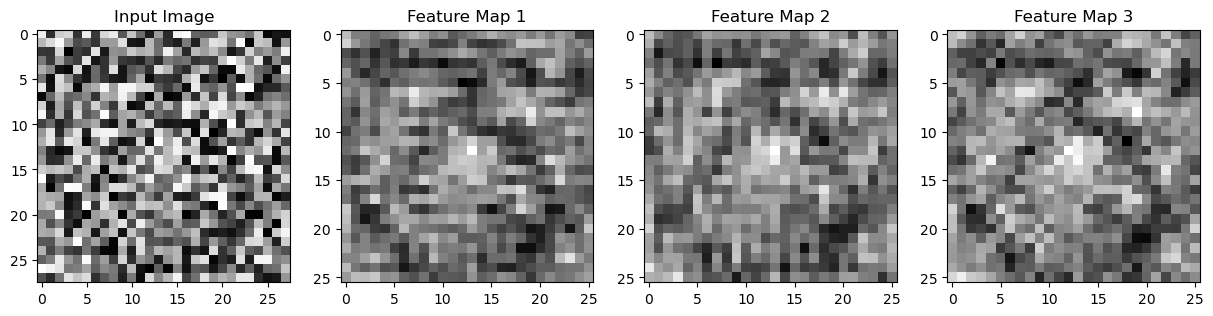

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define a random input image
input_image = np.random.rand(28, 28)
print(input_image)
print("_______________")

# Define multiple random filters
num_filters = 3  # Using 6 filters for visualization, but normally it's 32
filters = [np.random.rand(3, 3) for _ in range(num_filters)]
print(filters)

# Define the convolution operation
def convolve2d(image, filter):
    filter_height, filter_width = filter.shape
    image_height, image_width = image.shape
    output_height = image_height - filter_height + 1
    output_width = image_width - filter_width + 1
    output = np.zeros((output_height, output_width))
    
    for y in range(output_height):
        for x in range(output_width):
            output[y, x] = np.sum(image[y:y+filter_height, x:x+filter_width] * filter)
    
    return output

# Perform convolution with multiple filters
output_images = [convolve2d(input_image, f) for f in filters]
print(output_images)

# Visualize the input and output feature maps
fig, axes = plt.subplots(1, num_filters + 1, figsize=(15, 5))
axes[0].imshow(input_image, cmap='gray')
axes[0].set_title('Input Image')
for i, output_image in enumerate(output_images):
    axes[i+1].imshow(output_image, cmap='gray')
    axes[i+1].set_title(f'Feature Map {i+1}')
plt.show()


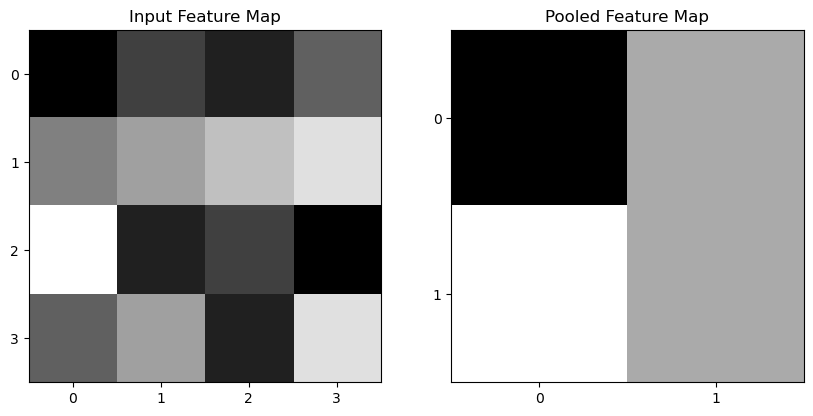

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define a sample input feature map
input_feature_map = np.array([
    [1, 3, 2, 4],
    [5, 6, 7, 8],
    [9, 2, 3, 1],
    [4, 6, 2, 8]
])

# Define the max pooling operation
def max_pooling(feature_map, pool_size):
    (h, w) = feature_map.shape
    output_h = h // pool_size
    output_w = w // pool_size
    pooled_map = np.zeros((output_h, output_w))
    
    for y in range(0, h, pool_size):
        for x in range(0, w, pool_size):
            pooled_map[y // pool_size, x // pool_size] = np.max(feature_map[y:y+pool_size, x:x+pool_size])
    
    return pooled_map

# Apply max pooling with a 2x2 window
pooled_feature_map = max_pooling(input_feature_map, 2)

# Visualize the input and output feature maps
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(input_feature_map, cmap='gray', interpolation='none')
axes[0].set_title('Input Feature Map')
axes[0].set_xticks(range(4))
axes[0].set_yticks(range(4))
axes[1].imshow(pooled_feature_map, cmap='gray', interpolation='none')
axes[1].set_title('Pooled Feature Map')
axes[1].set_xticks(range(2))
axes[1].set_yticks(range(2))
plt.show()


In [9]:
!pip install tensorflow

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [14]:
print("""
tensorflow as tf: Imports TensorFlow, which you'll use for building and training the neural network.
layers and models: These are submodules of Keras (an API within TensorFlow) that help define the structure of the CNN.
matplotlib.pyplot as plt: Used for plotting images and results, like visualizing the input images and model predictions.
""")


tensorflow as tf: Imports TensorFlow, which you'll use for building and training the neural network.
layers and models: These are submodules of Keras (an API within TensorFlow) that help define the structure of the CNN.
matplotlib.pyplot as plt: Used for plotting images and results, like visualizing the input images and model predictions.



In [24]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


In [26]:
print("""
Loading Data:
tf.keras.datasets.mnist.load_data() loads the MNIST dataset, which consists of 60,000 training images and 10,000 test images of handwritten digits (0-9).
Reshaping:
The images are reshaped to have an extra dimension ((28, 28, 1)) because CNNs expect input in a specific format: height, width, and the number of channels (1 for grayscale images).
Normalization:
The pixel values are normalized to be between 0 and 1 by dividing by 255. This helps the model converge faster during training.
""")


Loading Data:
tf.keras.datasets.mnist.load_data() loads the MNIST dataset, which consists of 60,000 training images and 10,000 test images of handwritten digits (0-9).
Reshaping:
The images are reshaped to have an extra dimension ((28, 28, 1)) because CNNs expect input in a specific format: height, width, and the number of channels (1 for grayscale images).
Normalization:
The pixel values are normalized to be between 0 and 1 by dividing by 255. This helps the model converge faster during training.



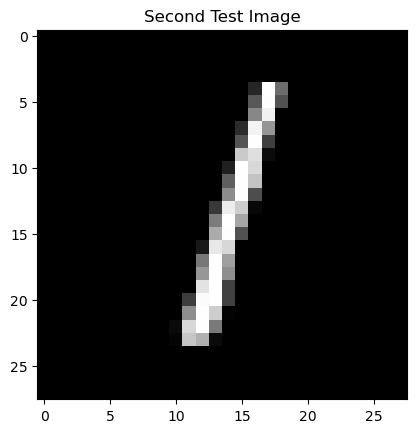

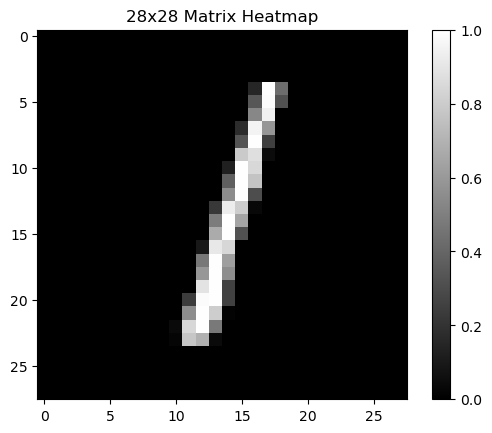

In [28]:
#print(test_images[2])
image=test_images[2]
plt.imshow(image, cmap='gray')
plt.title("Second Test Image")
plt.show()

matrix = np.array(image).reshape(28, 28)
plt.imshow(matrix, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.title("28x28 Matrix Heatmap")
plt.show()

In [30]:
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the feature map to feed into a fully connected layer
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 classes (for digits 0-9)
model.add(layers.Dense(10, activation='softmax'))


In [32]:
print("""
model = models.Sequential()
Sequential Model:
This creates a linear stack of layers. You'll add each layer step by step.""")

print("""
Conv2D Layer:
Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)):
This creates a convolutional layer with 32 filters, each of size 3x3.
The input_shape=(28, 28, 1) specifies the input image size and the number of channels (1 for grayscale).
The activation='relu' applies the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity and helps the network learn complex patterns.
MaxPooling2D Layer:
MaxPooling2D((2, 2)): This layer performs down-sampling (reducing the size of the feature maps) by taking the maximum value in a 2x2 region, which helps in reducing computational complexity and retaining important features.
Adding More Layers:
More convolutional and pooling layers are added to extract deeper features from the images.""")

print("""
Flatten Layer:
Flatten(): Converts the 2D feature maps into a 1D vector, which can be fed into fully connected layers.
Dense Layer:
Dense(64, activation='relu'): A fully connected layer with 64 neurons. Each neuron is connected to every neuron in the previous layer.
Dense(10, activation='softmax'): The output layer with 10 neurons (one for each digit 0-9). The softmax activation function outputs a probability distribution over the 10 classes.""")


model = models.Sequential()
Sequential Model:
This creates a linear stack of layers. You'll add each layer step by step.

Conv2D Layer:
Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)):
This creates a convolutional layer with 32 filters, each of size 3x3.
The input_shape=(28, 28, 1) specifies the input image size and the number of channels (1 for grayscale).
The activation='relu' applies the ReLU (Rectified Linear Unit) activation function, which introduces non-linearity and helps the network learn complex patterns.
MaxPooling2D Layer:
MaxPooling2D((2, 2)): This layer performs down-sampling (reducing the size of the feature maps) by taking the maximum value in a 2x2 region, which helps in reducing computational complexity and retaining important features.
Adding More Layers:
More convolutional and pooling layers are added to extract deeper features from the images.

Flatten Layer:
Flatten(): Converts the 2D feature maps into a 1D vector, which can be fed into fully conne

In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [36]:
print("""
Compile:
Optimizer (adam): Adam is an efficient and commonly used optimizer that adjusts the learning rate during training.
Loss Function (sparse_categorical_crossentropy): This is used for multi-class classification tasks, where the labels are integers. It measures the difference between the predicted probabilities and the actual labels.
Metrics (accuracy): The model will track accuracy, which is the percentage of correctly predicted labels.
""")


Compile:
Optimizer (adam): Adam is an efficient and commonly used optimizer that adjusts the learning rate during training.
Loss Function (sparse_categorical_crossentropy): This is used for multi-class classification tasks, where the labels are integers. It measures the difference between the predicted probabilities and the actual labels.
Metrics (accuracy): The model will track accuracy, which is the percentage of correctly predicted labels.



In [ ]:
model.fit(train_images, train_labels, epochs=150, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 52ms/step - accuracy: 0.8712 - loss: 0.4368 - val_accuracy: 0.9851 - val_loss: 0.0464
Epoch 2/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9830 - loss: 0.0550 - val_accuracy: 0.9864 - val_loss: 0.0392
Epoch 3/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.9887 - loss: 0.0344 - val_accuracy: 0.9893 - val_loss: 0.0312
Epoch 4/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 38s 41ms/step - accuracy: 0.9904 - loss: 0.0276 - val_accuracy: 0.9899 - val_loss: 0.0315
Epoch 5/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 50ms/step - accuracy: 0.9936 - loss: 0.0205 - val_accuracy: 0.9884 - val_loss: 0.0328
Epoch 6/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 45ms/step - accuracy: 0.9948 - loss: 0.0165 - val_accuracy: 0.9908 - val_loss: 0.0265
Epoch 7/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 150ms/step - accuracy: 0.9953 - loss: 0.0136 - val_accuracy: 0.9913 - val_loss: 0.0246
Epoch 8/150
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 39ms/step - accuracy: 0.9966 - loss:

In [ ]:
print("""
Train the Model:
epochs=5: The model will go through the entire training dataset 5 times.
batch_size=64: The model processes 64 images at a time before updating the weights.
validation_data: The test data is used for validation to monitor the model's performance on unseen data after each epoch.""")

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')


In [ ]:
predictions = model.predict(test_images)

# Plot the first test image, the true label, and the predicted label
plt.figure()
plt.imshow(test_images[21].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"True Label: {test_labels[21]}, Predicted Label: {predictions[21].argmax()}")
plt.show()
